In [163]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%load_ext autoreload
%autoreload 2

from sklearn.linear_model import LogisticRegression

# from miwae import miwae
# from metrics import tau_dr, tau_ols, tau_ols_ps
# from generate_data import gen_lrmf, ampute, gen_dlvm

l_tau = ['tau_dr', 'tau_ols', 'tau_ols_ps', 'mul_tau_dr', 'mul_tau_ols', 'mul_tau_ols_ps']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [164]:
df = pd.read_csv('results/exp_14_10_epochs.csv_temp')
df.drop(labels='Unnamed: 0', inplace=True, axis=1)
df

,model,n,d,p,prop_miss,seed,d_miwae,n_epochs,sig_prior,method,time,tau_dr,tau_ols,tau_ols_ps,mul_tau_dr,mul_tau_ols,mul_tau_ols_ps
0,dlvm,1000,3,20,0.1,0,3,10,0.1,glm,22,1.050555,1.051223,1.050919,1.057951,1.057952,1.057929
1,dlvm,1000,3,100,0.1,0,3,10,0.1,glm,35,0.965899,0.965496,0.963265,0.998142,0.998161,0.998101
2,dlvm,1000,3,1000,0.1,0,3,10,0.1,glm,752,1.059853,1.059378,1.057120,1.069886,1.069798,1.069468
3,dlvm,1000,3,20,0.3,0,3,10,0.1,glm,22,1.061960,1.061872,1.059111,1.058087,1.058092,1.058178
4,dlvm,1000,3,100,0.3,0,3,10,0.1,glm,35,0.981560,0.981905,0.974431,1.001248,1.001242,1.001056
5,dlvm,1000,3,1000,0.3,0,3,10,0.1,glm,761,1.061426,1.061254,1.061580,1.068187,1.068141,1.068120
6,dlvm,1000,3,20,0.0,0,3,10,0.1,glm,22,1.049047,1.049365,1.047149,1.057840,1.057834,1.057862
7,dlvm,1000,3,100,0.0,0,3,10,0.1,glm,35,0.979694,0.979418,0.979976,1.001941,1.001928,1.001766
8,dlvm,1000,3,1000,0.0,0,3,10,0.1,glm,761,1.056981,1.056765,1.054844,1.066186,1.066233,1.066656
9,dlvm,1000,3,20,0.1,0,3,200,0.1,glm,47,1.042365,1.042566,1.040944,1.057639,1.057625,1.057660


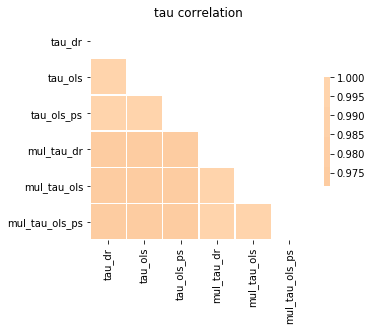

In [165]:
def correlation_tau(df):
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    corr = df.corr()
    corr = df[l_tau].corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask=mask, center=0, #, cmap=cmap
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title('tau correlation')
    # plt.savefig('results/tau_correlation_xxx.png')

def plot(df, tau = 'tau_dr'):
    for n in np.unique(df['n']):
        df_group = df[df['n']==n]
        plt.plot(df_group['n_epochs'], df_group[tau], label='n = ' + str(n))
        plt.xlabel('n_epochs')
        plt.ylabel(tau)
        plt.legend()
    
def plot_all_tau(df):
    l_tau = ['tau_dr', 'tau_ols', 'tau_ols_ps', 'mul_tau_dr', 'mul_tau_ols', 'mul_tau_ols_ps']
    plt.figure(figsize=(15,8))
    for i,tau in enumerate(l_tau):
        plt.subplot(3,2,i+1)
        plot(df, tau)
        
correlation_tau(df)

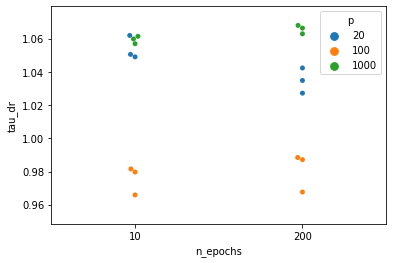

In [204]:
sns.swarmplot(x="n_epochs", y="tau_dr",hue="p", data=df)

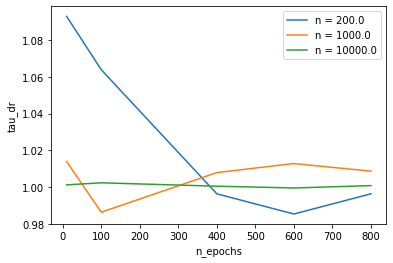

In [80]:
plot(df)

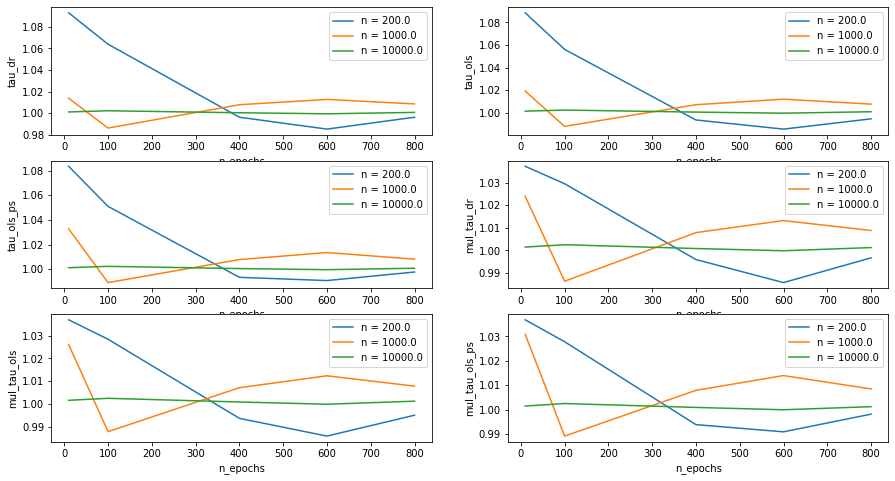

In [81]:
plot_all_tau(df)
# plt.savefig('results/n_epochs_xxx.png')

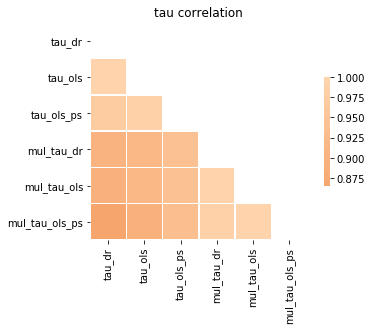

In [82]:
correlation_tau(df)

# Tests metrics

In [159]:
from main import *

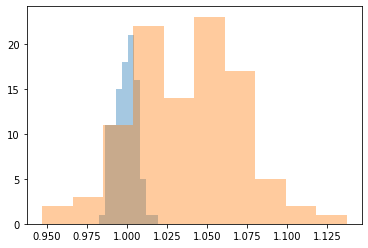

In [157]:
plt.hist(d_tau['tau_dr_oracle'], alpha = .4)
plt.hist(d_tau['tau_dr_perm'], alpha = .4)
plt.show()

In [152]:
list(zip(d_tau['tau_dr_oracle'],d_tau['tau_dr_perm']))

[(1.0088318657421078, 1.0040232486441607),
 (0.9930224257436742, 1.060121069496557),
 (0.9942091230046374, 1.0036147871319905),
 (1.013833246805073, 1.0775208982768398),
 (0.9999563772476585, 1.0158257304338962),
 (1.0002703710726608, 1.0051886244983426),
 (1.0028775532209866, 1.0240153699283414),
 (0.9997455774755349, 1.0130850976789905),
 (1.005483842408145, 1.0576879686852818),
 (1.0043962721966104, 1.1369397206156695),
 (0.9983076013571981, 1.0275823613616353),
 (0.9974537846834062, 0.9946641576220362),
 (1.0030565456234546, 1.0712838261300761),
 (1.0068682166264544, 1.0705795720809625),
 (0.9969549285350549, 1.0138256843226399),
 (1.0084342390540055, 1.0044018961690517),
 (1.0007867322142818, 1.0401227015116477),
 (0.9902493748433822, 0.9746907033127623),
 (1.0054555442716824, 1.0950480743014346),
 (0.9986891949101444, 1.0843010490164697),
 (0.995690460607266, 0.9864519384686533),
 (1.004757552545978, 1.049711739636924),
 (0.9965320300896648, 0.9469936274314771),
 (1.0062141766745

In [143]:
d['a']

[5]

In [147]:
d['c'].append(5)

In [148]:
d['c']

[5, 5, 5]